In [3]:
# !pip install datasets

In [19]:
import matplotlib.pyplot as plt
from datasets import load_dataset
from collections import Counter

import nltk
from nltk.draw.dispersion import dispersion_plot

In [33]:
# Load the dataset
dataset = load_dataset("jsulz/state-of-the-union-addresses")

# Extract the necessary columns
dates = [item["date"] for item in dataset["train"]]
texts = [item["lemmatized"] for item in dataset["train"]]

# Combine dates and texts, then sort by dates
sorted_data = sorted(zip(dates, texts), key=lambda x: x[0])
sorted_dates, sorted_texts = zip(*sorted_data)

# Convert back to lists if needed
sorted_dates = list(sorted_dates)
sorted_texts = list(sorted_texts)



In [34]:
# Verify the sorting
print(sorted_dates[-2:])

[Timestamp('2023-02-07 00:00:00'), Timestamp('2024-03-07 00:00:00')]


In [36]:
# Tokenize all texts and count word frequencies
all_words = []
for text in sorted_texts:
    # text is a list of words, so we can directly extend all_words
    all_words.extend(text)
word_counts = Counter(all_words)

In [37]:
all_words[0:10]

['embrace',
 'great',
 'satisfaction',
 'opportunity',
 'present',
 'congratulate',
 'present',
 'favorable',
 'prospect',
 'public']

In [38]:
# Get the most common words (excluding stopwords, if desired)
most_common_words = [word for word, freq in word_counts.most_common(10)]  # Adjust '10' for desired number

# Print the most common words
print("Most Common Words:", most_common_words)

# Prepare data for the lexical dispersion plot
word_occurrences = {word: [] for word in most_common_words}

for i, text in enumerate(texts):
    # text is already a list of tokens, no need to split
    tokens = text
    for word in most_common_words:
        word_occurrences[word].append(tokens.index(word) if word in tokens else None)



Most Common Words: ['state', 'government', 'year', 'make', 'congress', 'country', 'people', 'great', 'would', 'united']


In [47]:
focus_words=["science","war","waste","technology","god","fraud"]

<Figure size 1200x900 with 0 Axes>

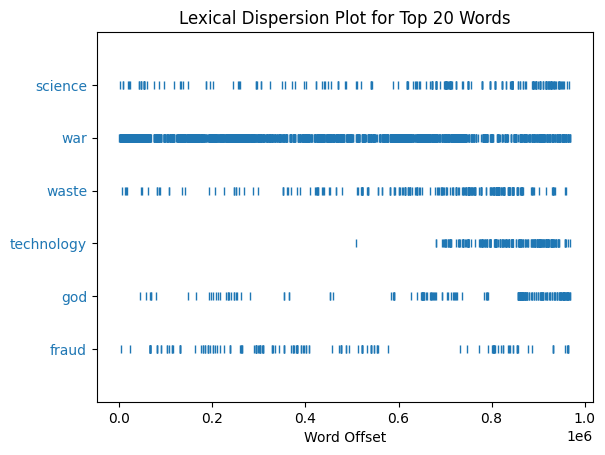

In [48]:
plt.figure(figsize=(12, 9))
dispersion_plot(all_words, focus_words, ignore_case=True, title='Lexical Dispersion Plot for Top 20 Words')
plt.show()